# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

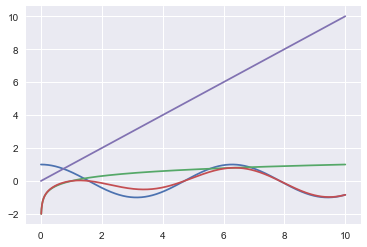

In [2]:
x = np.linspace(0, 10, 1000)
y_cos = np.cos(x)
y_log = np.log10(x)
y_cos_log = y_cos * y_log
y = x

plt.plot(x, y_cos, x, y_log, x, y_cos_log, x, y)

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

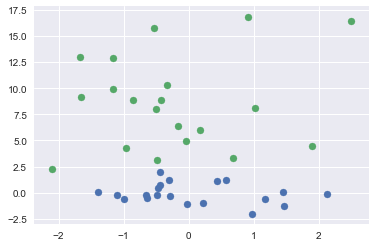

In [3]:
x_normal = np.random.randn(20)
y_normal = np.random.randn(20)
plt.scatter(x_normal, y_normal)

x_normal = np.random.randn(20)
y_gamma = np.random.gamma(4, 2, 20)
plt.scatter(x_normal, y_gamma)

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('data/bikes_rent.csv.gz', compression='gzip')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

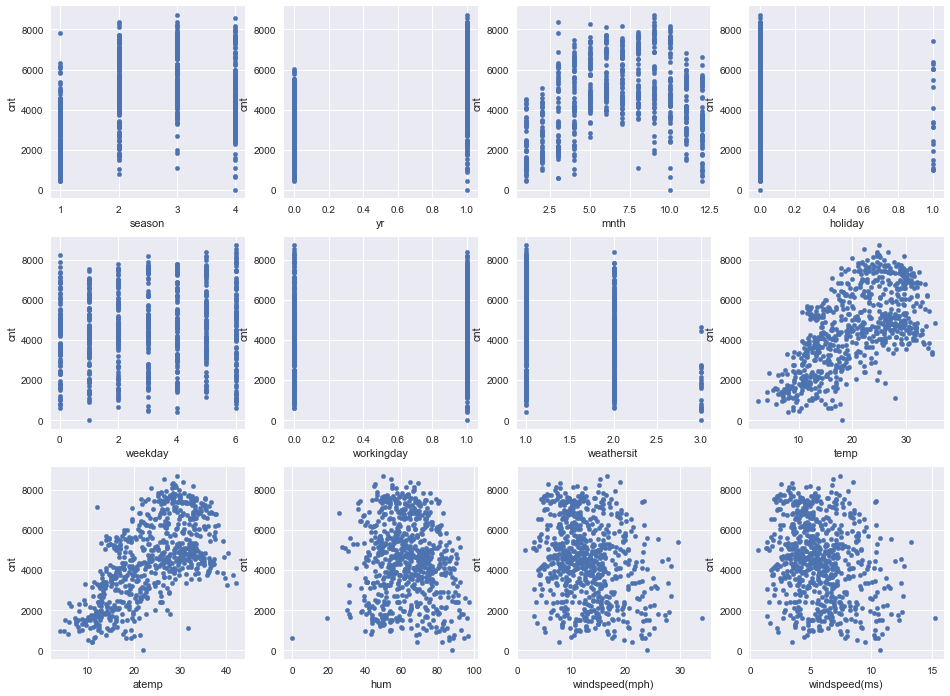

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: число прокатов увеличивается в середине года и к концу года число прокатов в среднем чуть юольше, чем в начале, так же величина имеет большой разброс.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: чем выше температура, тем больше в среднем берут велосипедов на прокат, то же самое относительно температуры по ощущениям.

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: кол-во прокатов меньше всего коррелирует с признаками: holiday, weekday, workingday, hum, т.к. коэффициент корреляции стримится к 0. наиболее всего коррелирует с признаками: yr, temp, atemp; т.к. с ними коэффициент корреляции по модулю ближе всего к 1.

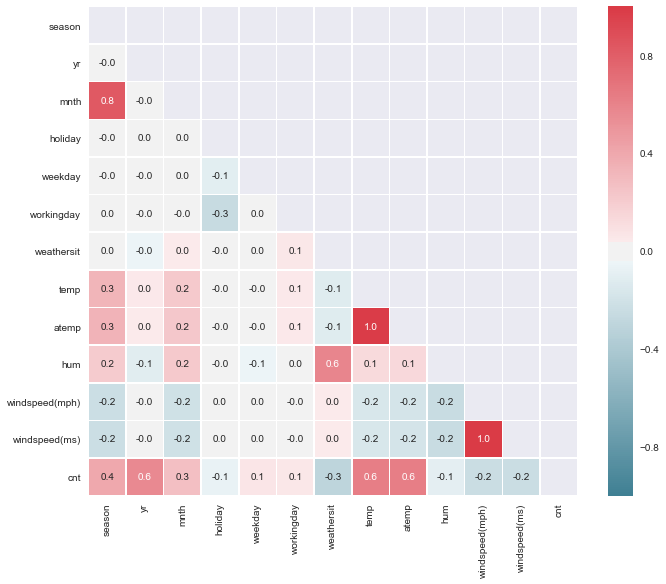

In [7]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: т.к. атрибут "yr" принимает всего 2 значения, а кол-во сданных велосипедов в первом году в среднем было меньше, а во втором году больше, то можно посчитать, что у года и кол-ва сданных велосипедов есть свяязь приближенная к линейной.

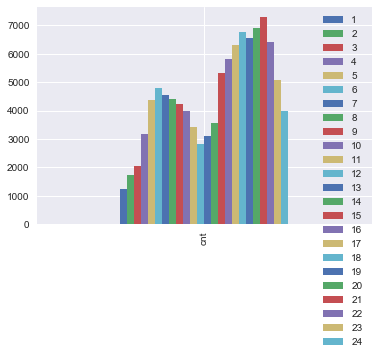

In [8]:
year1 = df.pivot_table('cnt', index='yr', columns='mnth')
year2 = pd.DataFrame(year1.ix[1])
year2.index += 12
year2 = year2.transpose()
year1 = year1.drop(1)
year1.index = ["cnt"]
year2.index = ["cnt"]

df_concat = pd.concat([year1, year2], axis=1)
df_concat.plot.bar()

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: данные собирались каждый день или почти каждый день, а так же во время составления выборки не было плохой погоды, либо в это время данные не попадали в выборку.
    
Ответ: равномерное распределение

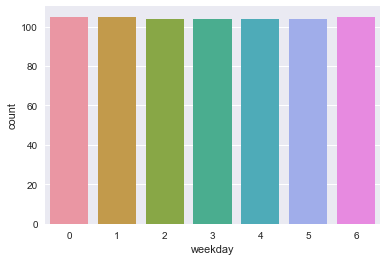

In [9]:
sns.countplot(x='weekday', data=df)

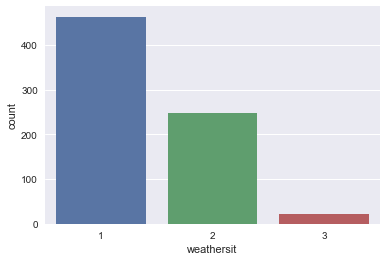

In [10]:
sns.countplot(x='weathersit', data=df)

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: ~4500

Ответ: нормальное распределение

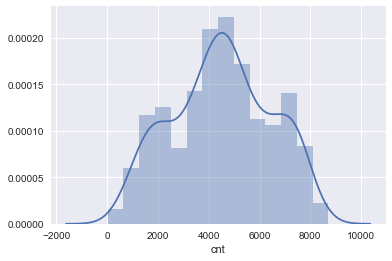

In [11]:
sns.distplot(df.cnt)

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: признаки сильно коррелируют, но если посмотреть на их природу, то это не удивительно, т.к. они оба вырожают температуру в определенный день.

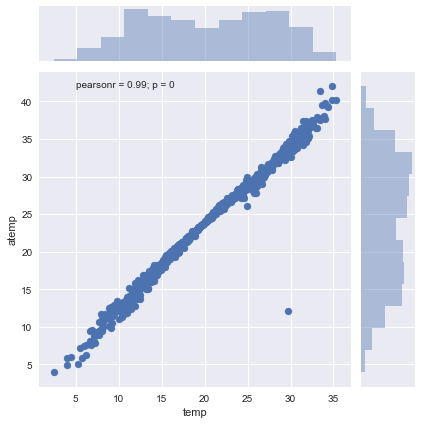

In [12]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ:
1. будних дней в месяце больше, чем выходных, по тому есть больше возможностей взять велосипед именно в будний день
2. т.к. обычно люди стараются в теплое время больше времени проводить на улице, то вполне возможно, что тогда в выходные дни будут брать больше велосипедов, т.к. в это время они свободнее чем в будни из-за работы и т.п.
3. если выходные дни - праздничные или они стоят перед значимыми событиями, вроде начала учебного года или т.п., то люди как парвило отдыхают дома или тратят свободное время на подготовку к этим событиям

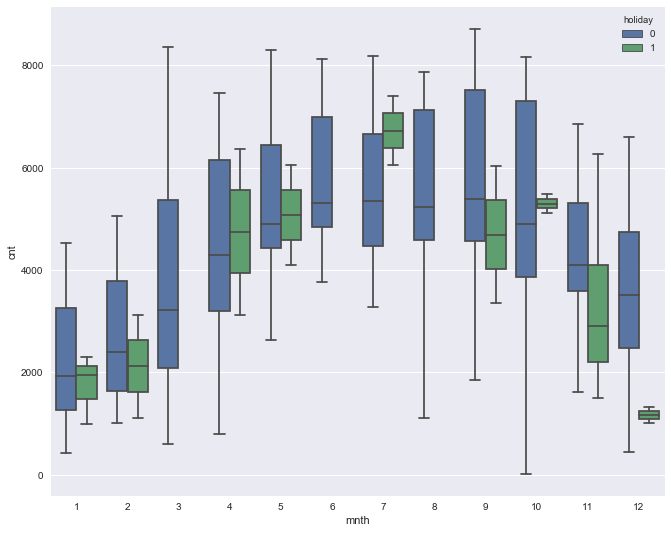

In [13]:
plt.subplots(figsize=(11, 9))
sns.boxplot(x='mnth', y='cnt', hue='holiday', data=df)

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Если добавить столбец разницы реальной температуры и температуры по ощущениям, то можно будет искать зависимость его значений с другими столбцами. По графикам видно, что разница между действительной и ощущаемой температурами и скорость ветра немного коррелируют, т.е. некоторая связь есть. Так же можно заметить, что обычно ощущаемая температура выше, чем она есть на самом деле, т.к. по оси "temperature-difference" большая часть значений левее 0, а когда значения левее 0, кажущаяся температура больше реальной.

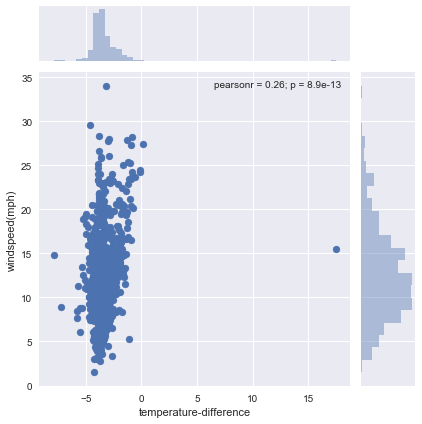

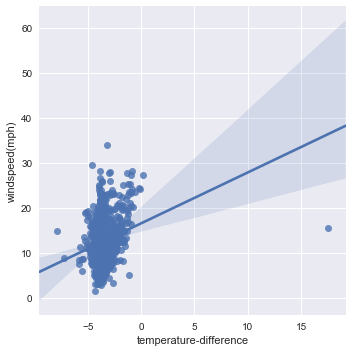

In [14]:
table = df
table["temperature-difference"] = df["temp"] - df["atemp"]
sns.jointplot(x='temperature-difference', y='windspeed(mph)', data=table)

sns.lmplot(x='temperature-difference', y='windspeed(mph)', data=table)